# Milestone 3: Sources, Forms, and Quantification of Bias and Discrimination in Supervised Learning
# PART I - THEORY 

# 1 - Introduction

In the previous milsetones, Fairness was explored in its ethical, legal and governance aspect. 

In this part of the course, we focus on how we deal with fairness in practice in Supervised Learning. Where does the discrimination comes from? What are the different ways for a model to be unfair?  How can we measure discrimination?


This milestone is divided in two parts: <br>
- **Part I** presents some theoretical aspects and provides some external references. It is itself divided in 3 parts: 
    - Real world examples of biased algorithms
    - Sources of bias
    - Definitions of fairness and associated quantification of bias <br>
- **Part II** consists of an exercise notebook which explores a specific example (hiring algorithm). 

We call protected attributes the features of an individual such as race, gender, age which we aim the model to be fair towards. We restrain ourselves to binary problems, where the outcome is either 0 (negative) or 1 (positive). The example throughout Milestone 3 and 4 will be a hiring algorithm where individuals with a positive outcome go to the next step. 

This notebook is complementary to the video and slides and covers the same material, with some additional references linked.  


# 2 - Bias in algorithm: real world examples
In the video and slides, we discuss a few real-life examples of bias in algorithms. Below are some references regarding these famous examples. <br> <br>
**COMPAS** <br>
https://www.uclalawreview.org/injustice-ex-machina-predictive-algorithms-in-criminal-sentencing/ <br>
https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing <br>
**Amazon's recruiting** <br>
https://www.businessinsider.com/amazon-ai-biased-against-women-no-surprise-sandra-wachter-2018-10?r=US&IR=T <br>
https://www.aclu.org/blog/womens-rights/womens-rights-workplace/why-amazons-automated-hiring-tool-discriminated-against <br>
**Apple's credit** <br>
https://www.wired.com/story/the-apple-card-didnt-see-genderand-thats-the-problem/ <br>
**Gender shades** <br>
http://proceedings.mlr.press/v81/buolamwini18a/buolamwini18a.pdf <br>
http://gendershades.org/

# 3 - Sources of Bias

One can refer to the two following papers for details on the different possible bias encountered:
- (Mehrabi et al., 2021) : [A survey on bias and fairness in machine learning](https://arxiv.org/pdf/1908.09635.pdf)
- (Suresh & Guttag, 2019) : [ A Framework for Understanding Sources of Harm
throughout the Machine Learning Life Cycle](https://arxiv.org/pdf/1901.10002.pdf)

We describe here a few common bias that follow Suresh & Guttag classification. Those are detailed and presented in the video/slides. 
- **Historical bias**: Pre-existing bias reflected in the data.
- **Representation bias**: When certain parts of the input space are underrepresented (sampling methods, training data)
- **Measurement bias**: Measurement process/ data quality may vary across groups (e.g. arrest rate as a measure of crime rate)
- **Aggregation bias**: Difference across groups might require several models rather than a one-size fit all model.
- **Evaluation bias**: When testing on benchmarks that are unbalanced compared to target population (e.g. facial recognition)
- **Deployment bias**: Mismatch between design purpose and use (e.g. person’s likelihood of committing a future crime used for determining the length of a sentence).

The following Figure taken from (Suresh & Guttag, 2019) illustrates how those bias interfere with the entire life-cycle of an algortithm and its use. 

![](img/cheatsheet_img1.png)

*Taken from*: Suresh, H., & Guttag, J. V. (2019). A framework for understanding unintended consequences of machine learning. arXiv preprint arXiv:1901.10002.

# 4 - Multitude of fairness


We now give an overview of what constitutes fairness in the Fair-ML literature.  

There are many mathematical definition of fairness in the literature, and it is commonly accepted that it is not possible to satisfy them all at the same time. Choosing a definition must be done depending on context and application, and we will comment on this later. In [Fairness Definitions Explained](http://www.ece.ubc.ca/~mjulia/publications/Fairness_Definitions_Explained_2018.pdf) from 2018, S.Verma and J.Rubin review the main definitions of fairness found in the literature in recent years (up to 2018) for classification problems. The paper [A Survey on Bias and Fairness in Machine Learning](https://arxiv.org/pdf/1908.09635.pdf)  by Mehrabi et al. also present a number of definition. Broadly speaking, we can split fairness as either individual fairness or group fairness:

*   **Individual fairness** : seeks for similar individuals to be treated similarly. 
*   **Group fairness** : split a population into groups defined by protected attributes and seeks for some measure to be equal across groups.


Let's explicit a few definitions belonging to each of these category in the context of a binary classification problem (with outcome being 0-negative or 1-positive). Note that the names of the concepts are not universal and different papers might use different names. The names we use can be found in the two papers linked above, as well as in the Holistic AI's library: https://www.holisticai.com/open-source. Holisticai is a python Fair-ML package that allows to quantify and mitigate bias. We will use it in Part 2 of this milestone.

## 4.1. Individual fairness

### Fairness through Unawareness
* **Definition:** "An algorithm is fair as long as any protected attributes A are not explicitly used in the decision-making process" (Mehrabi et al.,2021)
* **Mathematically**: There is no other requirements than the absence of explicit protected attributes from the input features. 
* **Challenges/Uses in practice**: The presence of proxies in the data make this method often insufficient. 

### Fairness through Awareness (a.k.a. individual fairness)
(Dwork et al., 2011) [Fairness Through Awareness](https://arxiv.org/pdf/1104.3913.pdf)
* **Definition:** "An algorithm is fair if it gives similar predictions to similar individuals" (Mehrabi et al.,2021)
* **Mathematically**:Two individuals $x, y$ are at distance $d(x, y) ∈ [0, 1]$. We consider a randomized classifier that maps individuals to probability distributions over outcomes (i.e., the individual $x$ will be classified as $0$ with a probability $p_x$ and as $1$ with a probability $1-x$). This definition of fairness imposes a Lipschitz condition that states that the statistical distance $D(M(x),M(y))$ between $M(x)$ and $M(y)$ must be at most $d(x, y)$ for all pairs of individuals $(x,y)$. 
* **Challenges/Uses in practice**: How can one choose a distance/similarity metric for individuals in the first place? (Dwork et al., 2011) states that: "The similarity metric expresses ground truth. When ground truth is unavailable, the metric may reflect the “best” available approximation as agreed upon by society."

###  Counterfactual fairness

(Kusner et al.,2017) [Counterfactual Fairness](https://arxiv.org/pdf/1703.06856.pdf)

* **Definition**: Counterfactual fairness assumes that a causal graph between features and the predited output is known. The causal graph is counterfactuall fair if the predicted outcome does not depend on a descendant of the protected attribute. The intuition is that the decision would be the same in a counterfactual world where the individual belongs to a different demographic group, i.e., if we change the protected attribute whilst keeping the factors that are not causally dependent on it constant, this should not change the distribution of the predicted outcome.  

* **Mathematically**: Let's assume we have a causal model such as the ones represented by the below directed acyclic graph (DAG) (taken from Kusner et al., 2017):

![](img/cheatsheet_img2.png)

with: <br>
<center>$
\left\{ 
  \begin{aligned}
    A = \text{protected attributes}\\
    X = \text{remaining attributes} \\
    Y = \text{predicted output} \\
    V = A \cup X = \text{observable variables} \\
    U = \text{latent background variables not caused by V} \\
  \end{aligned}
\right. $ </center>
<br>
Predictor $\hat{Y}$ is counterfactually fair if under any context $X = x$ and $A = a$:
<center>$
P(\hat{Y}_{A←a} (U) = y | X = x, A = a) = P(\hat{Y}_{A←a'} (U) = y | X = x, A = a),
$ </center> <br>
for all $y$ and for any value $a'$ attainable by $A$.

* **Illustration**: We take here directly the example given in (Kusner et al.,2017) which can be represented using the DAG on the right from above. A car insurance company predicts the accident rate of individuals $Y$. We have:
    - $U$ = unobserved variable = aggressive driving
    - $A$ = protected attribute = race
    - $X$ = remaining attribute = preference for red cars
    - $U -> X,Y$ : $U$ causes (a) a higher likelhood of accident and (b) a preference for red cars, hence impacts both $X$ and $Y$. 
    - $A -> X$: Being of a certain race $A$ is also linked with a preference for red cars, but these individuals are not more likely to be aggressive drivers or involved in accidents than others
    
    This predictor would be counterfactually fair if $Y$ did not depend on a descendant of $A$, or in other words, if changing $A$ while holding $U$ did not impact $Y$. Here it is impacted as changing $A$ changes $X$ which in turns changes $Y$, hence it is not counterfactually fair. Intuitively, this makes sense as using the preference for red car as a measure of the accident rate will penalize the individuals of a certain race that prefer red cars. 

* **Challenges/Uses in practice**: Building a causal graph is not easy and can become very unpractical with a high number of features. Additionally, a correlation between features does not always imply causation and if it does, in what direction? If it doesn't, would the machine learning model not use that feature as if it did ?

## 4.2. Group fairness

For the two following definitions, let's introduce an example with its confusion matrices. Let's take the example of a math exam with either pass or fail result. There are 100 candidates in total: 50 male and 50 female. We split the candidates in male and female candidates and obtain the following confusion matrices:

![](img/cheatsheet_img3.png)


For the metrics in this part, one can refer to the Holistic AI's [documentation](https://holisticai.readthedocs.io/en/latest/metrics.html) and [library](https://github.com/holistic-ai/holisticai).

### Equality of Outcome : Demographic parity
* **Definition:** When the likelihood of positive outcome is equal for individuals regardless of whether they are in the protected group or not. 
* **Mathematically**: If $A$ is the protected attribute, we want $P(\hat{Y}=1|A=0) = P(\hat{Y}=1|A=1)$ irrespective of the ground-truth label. <br>
* **Specific Metrics**: Let's call these probability Success Rates and note them $SR_0$ (success rate of the unprivileged group) and $SR_1$ (privileged group). There are different metrics for this same concept, we present two common ones:
     - ***Statistical parity*** measures the difference in success rates: $SP= SR_0 - SR_1$. The ideal value is 0.
     - ***Disparate impact*** measures the ratio: $DI = \frac{SR_0}{SR_1}$. The ideal value is 1. Fair values are usually considered to be between 0.8 ans 1.2. 
* **Illustration**: In the above example, there are 37 Male candidates predicted to pass against 26 Female candidates out of 50 for each. We have $SR_m= 0.74$ and $SR_f=0.52$, which gives: <br>
<center>$
\left\{ 
  \begin{aligned}
    SP = 0.52-0.74 = -0.22\\
    DI = 0.52/0.74 = 0.7 
  \end{aligned}
\right. $ </center>
* **Challenges/Uses in practice**: In practice, there might be historical (or other) biases which leads to an uneven success rate across different groups (e.g. more white males as CEO than dark-skinned or female individuals). The problem might be more a societal one than on of the algorithm, and solving it within the algorithm remit might means introducing positive discrimination, which asks sensitive societal and legal questions. For instance in hiring, this migh lead to "more qualified" privileged candidates being refused opportunities to the advantage of "less qualified" unprivileged candidates. 

###  Equality of Opportunity :  Equalised Odds
* **Definition:** The probability of a person in the positive class being correctly assigned a positive outcome and the probability of a person in a negative class being incorrectly assigned a positive outcome should both be the same for the privileged and unprivileged group members (for instance male and female). 
* **Mathematically**: (Mehrabi et al.,2021): "A predictor $\hat{Y}$ satisfies equalized odds with respect to protected attribute $A$ and outcome $Y$, if $\hat{Y}$ and $A$ are independent conditional on $Y$. <center>$ 
P(\hat{Y}=1|A=0,Y =y) = P(\hat{Y}=1|A=1,Y =y) , y ∈\{0,1\} "
$ </center> <br>
Note that: 
    - $P(\hat{Y}=1|A=a,Y=0)$ can be estimated using the False Positive Rate (FPR) in a specific problem, i.e. the proportion of positive prediction for individuals that actually have a negative outcome. We have $FPR = \frac{FP}{FP+TN}$.
    - $P(\hat{Y}=1|A=a,Y=1)$ can be estimated using the True Positive Rate (TPR), i.e. the proportion of positive prediction for individuals that actually have a positive outcome. We have $TPR = \frac{TP}{FN+TP}$.
* **Specific Metrics**: There are different metrics for this same concept, we present two common ones:
     - ***Average Odds Difference***: $AOD = \frac{1}{2} [(FPR_{0} - FPR_{1})+ (TPR_{0} - TPR_{1})]$
     - ***Equal Opportunity Difference***: $EOD = TPR_{0}- TPR_{1}$ <br>
    where 0 represents the unprivileged group and 1 the privileged one. For both metrics, the ideal value is 0 and fair values are considered between -0.1 and 0.1. 
* **Illustration**: In the above example, we have $FPR_{male} = \frac{FP}{FP+TN}= \frac{7}{17} = 0.41$; $TPR_{male} = \frac{TP}{FN+TP}= \frac{30}{33} = 0.91$;   $FPR_{female}= \frac{4}{22} = 0.18$ ,$TPR_{female}= \frac{22}{28} = 0.79$, hence we have:
<center>$
\left\{ 
  \begin{aligned}
    AOD = \frac{1}{2} [(0.18-0.41)+(0.79-0.91)] = -0.175 \\
    EOD = 0.79-0.91 = -0.12 
  \end{aligned}
\right. $ </center>
* **Challenges/Uses in practice**: This assumes that the ground-truth label is observed and unbiased for all individuals. In hiring for instance, the best available ground-truth label might be biased or unobserved, for instance it isimpossible to know if all historically rejected candidates would have been good employees. 


# 5 - Which definition to choose ? 

It is recognized that it is mathematically impossible to satisfy all common fairness definitions at the same time. There are numerous studies illustrating this and we refer the reader to the following: [[Kleinberg et al., 2016]](https://arxiv.org/pdf/1609.05807.pdf)  and [[Chouldechova, 2017]](https://arxiv.org/pdf/1610.07524.pdf). For a specific problem, we therefore have to choose an dapted definition of fairness. 

There is no easy way of doing this. Ideally,deciding which definition to use must be done in accordance with governance structures. In practice there is little guidance and this is decided on a case-by-case basis and through best practice in specific indutries. 



[This 2019 paper](https://arxiv.org/pdf/1912.06883.pdf) from Binns also looks at the apparent conflict between individual and group fairness on a more conceptual level. 

Individual concepts of fairness have limited applicability in practice and are rarely used. Indeed, leaving out protected attributes is often not enough (Fairness through Unawareness) because of the presence of proxies in the data, and the two other methods can be difficult to implement: it is not easy to come up and agree on a similarity measure between individuals for Fairness Through Awareness, and similarly to construct a causal graph for Counterfactual Fairness, especially as the number of features increases.

In the group fairness space, the debate is between using an Equality of Outcome or Equality of Opportunity approach. The paper by [Friedler et al., 2016](https://arxiv.org/pdf/1609.07236.pdf?source=post_page%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D%2D-) gives an interesting perspective. It introduces the concept of "worldviews" and states that there are two worldviews that dictates the concept of fairness to be used. Before presenting these wordlview, we need to present their idea of an "observed space" and "construct space". The "observed space" contain the actual observable features of the individuals that we have at hands to make a dieision, but that may contain biases. The "construct space" is an hypothetical ideal and unobservable space that contain the *true features* of each inividuals, once the observable space is freed from all biases. 

The figure below present the observed space (with Black and White individuals separated by a line as an illustration) and construct space.

![](img/cheatsheet_img4.png)
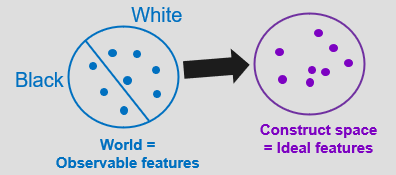

The two worldviews are:
- Worldview "What you see is what you get" (WYSIWYG). This states that the observed space is essentially the same as the construct space, hence individuals can be directly compared using the observed features and labels. This re-joins the concept of Fairness Through Awareness, but also the Equality of Opportunity definitions of fairness where we just seek for the model to be equally accurate or inaccurate for all groups. 
- Worldview "We're all equal" (WAE).  Here we assume that the observed space is not a good measure of the construct space as there exists structural bias. This re-joins the concept of Equaility of Outcome. 

The paper illustrates these two wordview using the SAT example:
- "Worldview says that the score correlates well with future success and there is a way to use the score to correctly compare the abilities of applicants". -> use equality of opportunity metrics such as Average Odds Difference. 
- "Worldview says that the SAT score may contain structural biases so its distribution being different across groups should not be mistaken for a difference in distribution in ability." -> use equality of outcome metrics such as Disparate Impact. 